In [1]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from scipy.ndimage import median_filter

In [2]:
f = netCDF4.Dataset('moana_dataset_merged.nc')
print(f) 

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): number_of_lines(1710), pixels_per_line(1272)
    variables(dimensions): float32 picoeuk_moana(number_of_lines, pixels_per_line), float32 prococcus_moana(number_of_lines, pixels_per_line), float32 syncoccus_moana(number_of_lines, pixels_per_line), float32 rhos_465(number_of_lines, pixels_per_line), float32 rhos_555(number_of_lines, pixels_per_line), float32 rhos_645(number_of_lines, pixels_per_line), int16 poc(number_of_lines, pixels_per_line), float32 chlor_a(number_of_lines, pixels_per_line), int32 l2_flags(number_of_lines, pixels_per_line), float32 longitude(number_of_lines, pixels_per_line), float32 latitude(number_of_lines, pixels_per_line), float32 tilt(number_of_lines)
    groups: 


In [3]:
print(f.variables.keys()) # get all variable names

dict_keys(['picoeuk_moana', 'prococcus_moana', 'syncoccus_moana', 'rhos_465', 'rhos_555', 'rhos_645', 'poc', 'chlor_a', 'l2_flags', 'longitude', 'latitude', 'tilt'])


In [4]:
lon = f.variables['longitude'] 
lat = f.variables['latitude'] 
pro = f.variables['prococcus_moana']
pico = f.variables['picoeuk_moana'] 
syn = f.variables['syncoccus_moana'] 

pro

<class 'netCDF4._netCDF4.Variable'>
float32 prococcus_moana(number_of_lines, pixels_per_line)
    _FillValue: -32767.0
    long_name: cell abundances of Prochlorococcus
    units: cells ml^-1
    valid_min: 0.0
    valid_max: 600000.0
    reference: Lange et al. (2020). Radiometric approach for the detection of picophytoplankton assemblages across oceanic fronts. Optics Express, 28, 25682-25705, doi.org/10.1364/OE.398127
    coordinates: longitude latitude
unlimited dimensions: 
current shape = (1710, 1272)
filling on

/tmp/ipykernel_182/2868463355.py:3: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plot=ax.pcolor(lon,lat,pro,cmap='YlGnBu_r',vmax=400000)
/tmp/ipykernel_182/2868463355.py:10: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = plt.colorbar(plot,ax=ax)


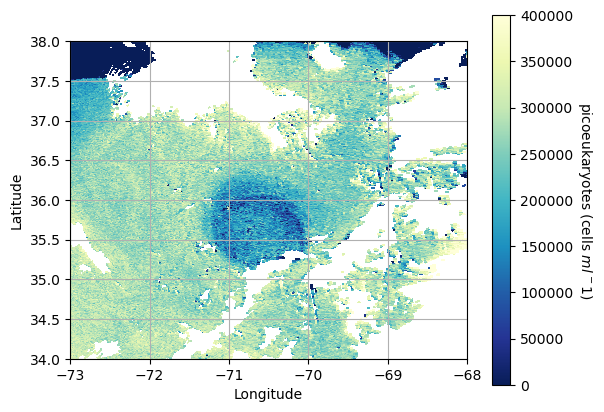

In [5]:
fig = plt.figure()
ax = plt.axes()
plot=ax.pcolor(lon,lat,pro,cmap='YlGnBu_r',vmax=400000)
ax.grid(True)
ax.axis("scaled")
ax.set_ylabel('latitude')
ax.set_xlabel('longitude')
ax.set_ylim([34,38])
ax.set_xlim([-73,-68])
cbar = plt.colorbar(plot,ax=ax)
cbar.set_label('picoeukaryotes (cells $ml^-1$)', rotation=270, labelpad=15)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
plt.show()

/tmp/ipykernel_182/573412675.py:5: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plot=ax.pcolor(lon,lat,syn,cmap='Reds',vmax=13000)
/tmp/ipykernel_182/573412675.py:12: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = plt.colorbar(plot,ax=ax)


<Figure size 640x480 with 0 Axes>

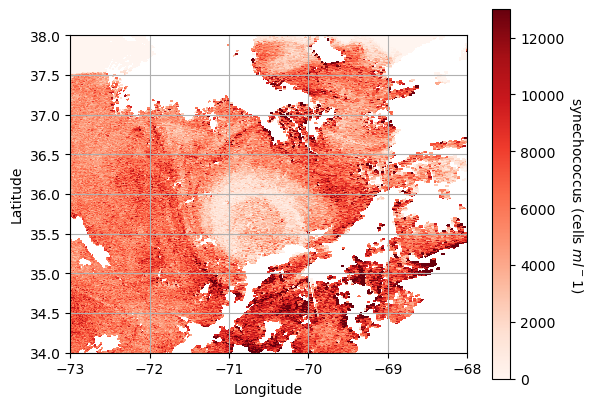

In [6]:
plt.clf() # if you don't clear figs for these the kernel might crash

fig = plt.figure()
ax = plt.axes()
plot=ax.pcolor(lon,lat,syn,cmap='Reds',vmax=13000)
ax.grid(True)
ax.axis("scaled")
ax.set_ylabel('latitude')
ax.set_xlabel('longitude')
ax.set_ylim([34,38])
ax.set_xlim([-73,-68])
cbar = plt.colorbar(plot,ax=ax)
cbar.set_label('synechococcus (cells $ml^-1$)', rotation=270, labelpad=15)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
plt.show()

/tmp/ipykernel_182/1336532925.py:5: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plot=ax.pcolor(lon,lat,pro,cmap='Greens',vmax=400000)
/tmp/ipykernel_182/1336532925.py:12: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = plt.colorbar(plot,ax=ax)


<Figure size 640x480 with 0 Axes>

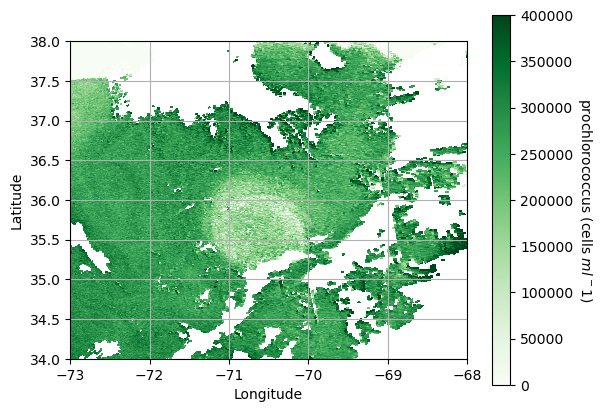

In [7]:
plt.clf()

fig = plt.figure()
ax = plt.axes()
plot=ax.pcolor(lon,lat,pro,cmap='Greens',vmax=400000)
ax.grid(True)
ax.axis("scaled")
ax.set_ylabel('latitude')
ax.set_xlabel('longitude')
ax.set_ylim([34,38])
ax.set_xlim([-73,-68])
cbar = plt.colorbar(plot,ax=ax)
cbar.set_label('prochlorococcus (cells $ml^-1$)', rotation=270, labelpad=15)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
plt.show()

In [9]:
dataset = xr.open_dataset('moana_dataset_merged.nc') #Open data with xarray for 'slice plots'
pico=dataset["picoeuk_moana"]
lon = dataset['longitude'] 
lat = dataset['latitude'] 
pro = dataset['prococcus_moana']
pico = dataset['picoeuk_moana'] 
syn = dataset['syncoccus_moana'] 

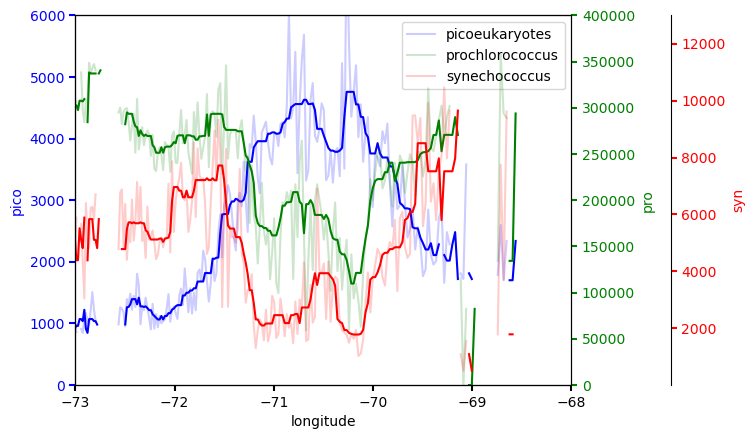

In [10]:
fig, ax = plt.subplots()
fig.subplots_adjust(right=0.9)

twin1 = ax.twinx()
twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin2.spines.right.set_position(("axes", 1.2))

p1, = ax.plot(lon[1080,:].values,pico[1080,:].values, "b-", label="picoeukaryotes",alpha=0.2)
ax.plot(lon[1080,:].values,median_filter(pico[1080,:].values,10), "b-", label="picoeukaryotes")
p2, = twin1.plot(lon[1080,:].values,pro[1080,:].values, "g-", label="prochlorococcus",alpha=0.2)
twin1.plot(lon[1080,:].values,median_filter(pro[1080,:].values,10), "g-", label="prochlorococcus")
p3, = twin2.plot(lon[1080,:].values,syn[1080,:].values, "r-", label="synechococcus",alpha=0.2)
twin2.plot(lon[1080,:].values,median_filter(syn[1080,:].values,10), "r-", label="synechococcus")

ax.set_xlim(-73,-68)
ax.set_ylim(0,6000)
twin1.set_ylim(0, 400000)
twin1.set_xlim(-73,-68)
twin2.set_ylim(1, 13000)
twin2.set_xlim(-73,-68)

ax.set_xlabel("longitude")
ax.set_ylabel("pico")
twin1.set_ylabel("pro")
twin2.set_ylabel("syn")

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

ax.legend(handles=[p1, p2, p3])

plt.show()

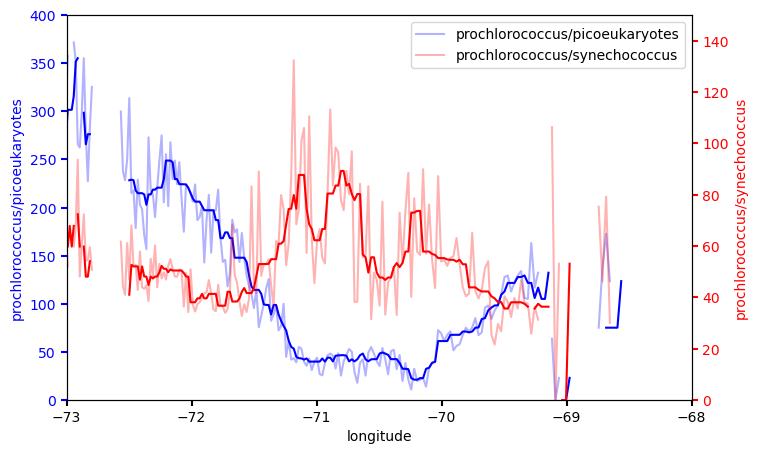

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
# twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
# twin2.spines.right.set_position(("axes", 1.2))

p1, = ax.plot(lon[1080,:].values,pro[1080,:].values/pico[1080,:].values, "b-", label="prochlorococcus/picoeukaryotes",alpha=0.3)
ax.plot(lon[1080,:].values,median_filter(pro[1080,:].values/pico[1080,:].values,10), "b-", label="prochlorococcus/picoeukaryotes")
p2, = twin1.plot(lon[1080,:].values,pro[1080,:].values/syn[1080,:].values, "r-", label="prochlorococcus/synechococcus",alpha=0.3)
twin1.plot(lon[1080,:].values,median_filter(pro[1080,:].values/syn[1080,:].values,10), "r-", label="prochlorococcus/synechococcus")
# p3, = twin2.plot(lon[1080,:].values,syn[1080,:].values, "r-", label="syn")

ax.set_xlim(-73,-68)
ax.set_ylim(0,400)
twin1.set_ylim(0, 150)
twin1.set_xlim(-73,-68)
# twin2.set_ylim(1, 13000)
twin2.set_xlim(-73,-68)

ax.set_xlabel("longitude")
ax.set_ylabel("prochlorococcus/picoeukaryotes")
twin1.set_ylabel("prochlorococcus/synechococcus")
# twin2.set_ylabel("syn")

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
# twin2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
# twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

# ax.legend(handles=[p1, p2, p3])
ax.legend(handles=[p1, p2])
plt.show()